In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


#required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/logistic-regression-heart-disease-prediction/framingham_heart_disease.csv


In [2]:
#load data from CSV

df = pd.read_csv("/kaggle/input/logistic-regression-heart-disease-prediction/framingham_heart_disease.csv")
df.drop(['education'],axis=1,inplace=True)
df.drop(['currentSmoker'],axis=1,inplace=True)
df.drop(['cigsPerDay'],axis=1,inplace=True)
df.drop(['male'],axis=1,inplace=True)
df.head()

,age,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
#remove null

df = df.dropna(axis=0)
df.isnull().sum()

age                0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

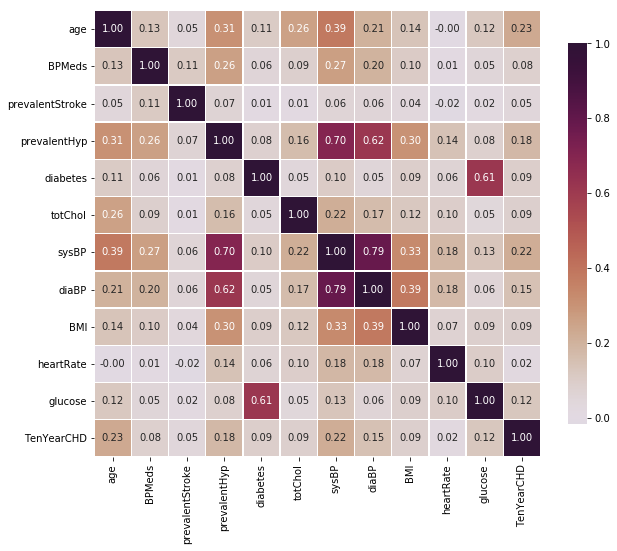

In [4]:
#correlation matrix

def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',cmap = 'twilight_shifted',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

In [5]:
#data preprocessing

df = df[[ 'age','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]

df['TenYearCHD'] = df['TenYearCHD'].astype(int)


df.head()

,age,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
#define x

x = np.asarray(df[['age','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose',]])

x[0:5]

array([[ 39.  ,   0.  ,   0.  ,   0.  ,   0.  , 195.  , 106.  ,  70.  ,
         26.97,  80.  ,  77.  ],
       [ 46.  ,   0.  ,   0.  ,   0.  ,   0.  , 250.  , 121.  ,  81.  ,
         28.73,  95.  ,  76.  ],
       [ 48.  ,   0.  ,   0.  ,   0.  ,   0.  , 245.  , 127.5 ,  80.  ,
         25.34,  75.  ,  70.  ],
       [ 61.  ,   0.  ,   0.  ,   1.  ,   0.  , 225.  , 150.  ,  95.  ,
         28.58,  65.  , 103.  ],
       [ 46.  ,   0.  ,   0.  ,   0.  ,   0.  , 285.  , 130.  ,  84.  ,
         23.1 ,  85.  ,  85.  ]])

In [7]:
#define y

y = np.asarray(df['TenYearCHD'])
y [0:5]

array([0, 0, 0, 1, 0])

In [8]:
#normalization

x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.23597297, -0.17648666, -0.07480323, -0.67238156, -0.16666667,
        -0.9410834 , -1.19715978, -1.08453119,  0.28492784,  0.35706497,
        -0.2058111 ],
       [-0.4178953 , -0.17648666, -0.07480323, -0.67238156, -0.16666667,
         0.29085248, -0.51604204, -0.16260417,  0.71798691,  1.61037897,
        -0.24775802],
       [-0.18415883, -0.17648666, -0.07480323, -0.67238156, -0.16666667,
         0.17885831, -0.22089102, -0.24641572, -0.11614392, -0.06070636,
        -0.49943952],
       [ 1.33512827, -0.17648666, -0.07480323,  1.48725078, -0.16666667,
        -0.26911837,  0.80078559,  1.01075749,  0.68107847, -0.89624902,
         0.88480877],
       [-0.4178953 , -0.17648666, -0.07480323, -0.67238156, -0.16666667,
         1.07481168, -0.1073714 ,  0.08883047, -0.66731001,  0.77483631,
         0.12976425]])

In [9]:
#train and test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Train set: (3019, 11) (3019,)
Test set: (755, 11) (755,)


In [10]:
#using lofistic regression

LR = LogisticRegression(C=0.01 , solver='liblinear').fit(x_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
#predict

y_hat = LR.predict(x_test)

In [12]:
#accuracy

accuracy_score(y_test,y_hat)

0.856953642384106

In [13]:
#confiusion matrix

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.cool):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

[[  6 104]
 [  4 641]]


Confusion matrix, without normalization
[[  6 104]
 [  4 641]]


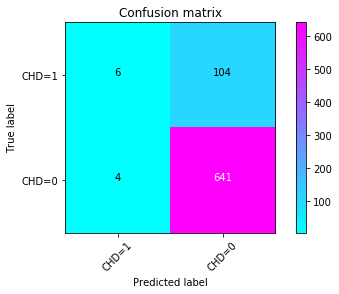

In [14]:
#compute confusion matrix

cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


#plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['CHD=1','CHD=0'],normalize= False,  title='Confusion matrix')